# Import libraries

In [1]:
import numpy as np
import cv2

# List of categories that can be classified by MobileNet model

In [2]:
categories = { 0: 'background',
    1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
    5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
    10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
    14: 'motorbike', 15: 'person', 16: 'pottedplant',
    17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

# load the pre-trained model using opencv dnn

In [3]:
net = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt.txt', 'MobileNetSSD_deploy.caffemodel')

# read input image

In [4]:
image = cv2.imread('dataset/image_2.jpeg')

In [5]:
(h, w) = image.shape[:2]

# construct a blob for image

In [6]:
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

# feed to the model and get the result

In [7]:
net.setInput(blob)
detections = net.forward()

# randomly selecting color for the bounding box

In [10]:
colors = np.random.uniform(255, 0, size=(len(categories), 3))

# Display the result

In [11]:
for i in np.arange(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence >0.2:
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        label = "{}: {:.2f}%".format(categories[idx], confidence * 100)        
        cv2.rectangle(image, (startX, startY), (endX, endY), colors[idx], 2)     
        y = startY - 15 if startY - 15>15 else startY + 15     
        cv2.putText(image, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[idx], 2)
cv2.imshow("Output", image)
cv2.waitKey(5000)
cv2.destroyAllWindows() 

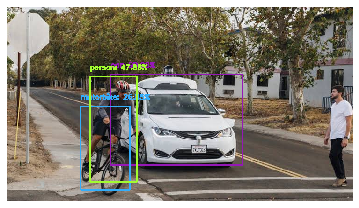

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
# ax1.set_title('object detection')
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()